In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
### https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
    
#You have everything you need to plot the decision boundary for this non-linear data. We can do that with 
#a few lines of code that use the Matlibplot library, just like the other plots.

# plot data and decision boundary


In [21]:
def accuracy(y_test, y_predict):
    acc = 0 
    for i in range (len(y_test)):
        if y_test[i] == y_predict[i]:
            acc += 1
    print("accuracy is : "  , acc/len(y_test)) 

accuracy is :  1.0


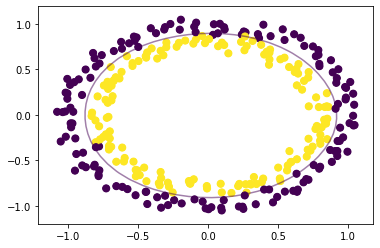

In [24]:
if __name__ == "__main__":
    df=pd.read_csv("data2.csv")
    X = df.drop('Class', axis=1)
    
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    X = X.to_numpy()
    y = y.to_numpy()
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
    nonlinear_clf = SVC(kernel='rbf', C=1.0)
    nonlinear_clf.fit(X_train, y_train)
    y_predict = nonlinear_clf.predict(X_test)
    accuracy(y_test, y_predict)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_decision_boundary(nonlinear_clf)
    plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
    plt.show()
    